In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import pandas as pd
import time
import networkx as nx
import anndata as An
import infomap as Im 
from multiprocessing import Pool
import itertools
import sklearn as sl
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [3]:
G65=nx.read_pajek("E6.5_impurity_corr_cut.net")
G75=nx.read_pajek("E7.5_impurity_corr_cut.net")
G85=nx.read_pajek("E8.5_impurity_corr_cut.net")
G95=nx.read_pajek("E9.5_impurity_corr_cut.net")

In [4]:
R65_edges_weight=G65.size(weight="weight")/G65.number_of_edges()
R75_edges_weight=G75.size(weight="weight")/G75.number_of_edges()
R85_edges_weight=G85.size(weight="weight")/G85.number_of_edges()
R95_edges_weight=G95.size(weight="weight")/G95.number_of_edges()
invivo=np.array([R65_edges_weight,R75_edges_weight,R85_edges_weight,R95_edges_weight])
days1=np.array([6.5,7.5,8.5,9.5])

In [48]:
np.corrcoef(np.array(G65.out_degree)[:,1].astype(int),np.array(G65.in_degree)[:,1].astype(int))[0,1]

0.4617252135387993

In [49]:
corr=np.array([np.corrcoef(np.array(G65.out_degree)[:,1].astype(int),np.array(G65.in_degree)[:,1].astype(int))[0,1],np.corrcoef(np.array(G75.out_degree)[:,1].astype(int),np.array(G75.in_degree)[:,1].astype(int))[0,1],np.corrcoef(np.array(G85.out_degree)[:,1].astype(int),np.array(G85.in_degree)[:,1].astype(int))[0,1],np.corrcoef(np.array(G95.out_degree)[:,1].astype(int),np.array(G95.in_degree)[:,1].astype(int))[0,1]])

In [50]:
corr

array([0.46172521, 0.62716853, 0.68555562, 0.50216175])

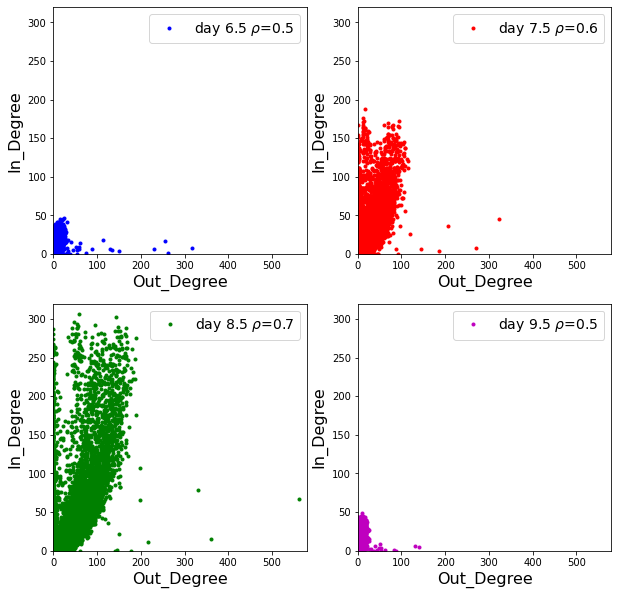

In [58]:
fig,ax=plt.subplots(2,2,figsize=(10,10))
ax[0,0].plot(np.array(G65.out_degree)[:,1].astype(int),np.array(G65.in_degree)[:,1].astype(int),'.b',label=r"day 6.5 $\rho$="+str(round(corr[0],1)))
ax[0,1].plot(np.array(G75.out_degree)[:,1].astype(int),np.array(G75.in_degree)[:,1].astype(int),'.r',label=r"day 7.5 $\rho$="+str(round(corr[1],1)))
ax[1,0].plot(np.array(G85.out_degree)[:,1].astype(int),np.array(G85.in_degree)[:,1].astype(int),'.g',label=r"day 8.5 $\rho$="+str(round(corr[2],1)))
ax[1,1].plot(np.array(G95.out_degree)[:,1].astype(int),np.array(G95.in_degree)[:,1].astype(int),'.m',label=r"day 9.5 $\rho$="+str(round(corr[3],1)))
ax[0,0].set_xlim(0,580)
ax[0,1].set_xlim(0,580)
ax[1,0].set_xlim(0,580)
ax[1,1].set_xlim(0,580)
ax[0,0].set_ylim(0,320)
ax[0,1].set_ylim(0,320)
ax[1,0].set_ylim(0,320)
ax[1,1].set_ylim(0,320)
ax[0,0].legend(fontsize=14)
ax[0,1].legend(fontsize=14)
ax[1,1].legend(fontsize=14)
ax[1,0].legend(fontsize=14)
ax[0,0].set_xlabel("Out_Degree",fontsize=16)
ax[0,1].set_xlabel("Out_Degree",fontsize=16)
ax[1,1].set_xlabel("Out_Degree",fontsize=16)
ax[1,0].set_xlabel("Out_Degree",fontsize=16)
ax[0,0].set_ylabel("In_Degree",fontsize=16)
ax[0,1].set_ylabel("In_Degree",fontsize=16)
ax[1,1].set_ylabel("In_Degree",fontsize=16)
ax[1,0].set_ylabel("In_Degree",fontsize=16)


fig.savefig("degree_out_degree_in_cutoff.png")

In [7]:
np.array(G65.out_degree)[:,0][np.argsort(np.array(G65.out_degree)[:,1].astype(int))][-10:]

array(['0610009D07Rik', '0610009O20Rik', '0610010K14Rik', '0610009B22Rik',
       '0610007P22Rik', '0610007P08Rik', '0610007C21Rik', '0610007P14Rik',
       '0610005C13Rik', '0610007L01Rik'], dtype='<U14')

In [8]:
np.array(G75.out_degree)[:,0][np.argsort(np.array(G75.out_degree)[:,1].astype(int))][-10:]

array(['Arpp19', 'Atp5g3', 'AC151602.1', 'Cct7', '0610007P22Rik', '7SK',
       '0610005C13Rik', '0610007P14Rik', '0610007C21Rik', '0610007L01Rik'],
      dtype='<U14')

In [9]:
np.array(G85.out_degree)[:,0][np.argsort(np.array(G85.out_degree)[:,1].astype(int))][-10:]

array(['Bex4', 'Bex2', 'Grinl1a', 'Hspe1', '0610010K14Rik',
       '0610007P22Rik', '0610007P08Rik', '0610007P14Rik', '0610007C21Rik',
       '0610007L01Rik'], dtype='<U15')

In [10]:
np.array(G95.out_degree)[:,0][np.argsort(np.array(G95.out_degree)[:,1].astype(int))][-10:]

array(['0610010K14Rik', '0610012G03Rik', '0610009D07Rik', '0610007P08Rik',
       '7SK', '0610009B22Rik', '0610007P22Rik', '0610007C21Rik',
       '0610007P14Rik', '0610007L01Rik'], dtype='<U15')

In [11]:
im65 =Im.Infomap("--clu --ftree -d -N 5 ");
im65.read_file("E6.5_impurity_corr_cut.net");
im65.run();
im75 =Im.Infomap("--clu --ftree -d -N 5 ");
im75.read_file("E7.5_impurity_corr_cut.net");
im75.run();
im85 =Im.Infomap("--clu --ftree -d -N 5 ");
im85.read_file("E8.5_impurity_corr_cut.net");
im85.run();
im95 =Im.Infomap("--clu --ftree -d -N 5 ");
im95.read_file("E9.5_impurity_corr_cut.net");
im95.run();


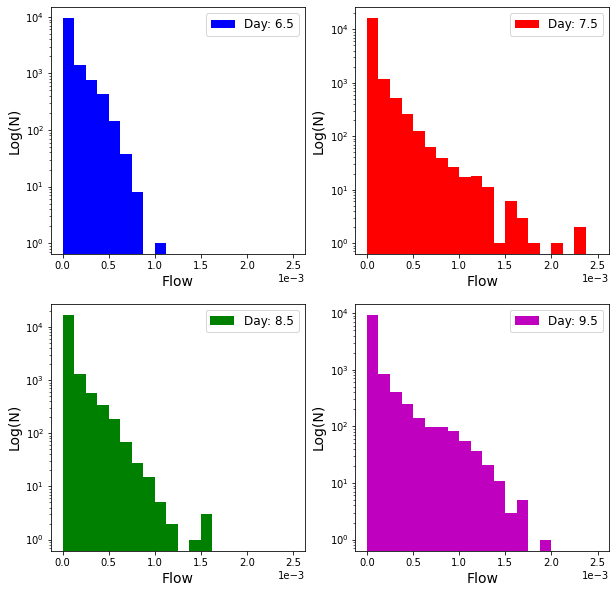

In [61]:
fig,ax=plt.subplots(2,2,figsize=(10,10))
ax[0,0].hist(im65.get_dataframe(columns=["flow"]).flow,log=True,label="Day: 6.5",color="blue",bins=20,range=[0,0.0025])
ax[0,1].hist(im75.get_dataframe(columns=["flow"]).flow,log=True,label="Day: 7.5",color="red",bins=20,range=[0,0.0025])
ax[1,0].hist(im85.get_dataframe(columns=["flow"]).flow,log=True,label="Day: 8.5",color="green",bins=20,range=[0,0.0025])
ax[1,1].hist(im95.get_dataframe(columns=["flow"]).flow,log=True,label="Day: 9.5",color="m",bins=20,range=[0,0.0025])
ax[0,0].legend(fontsize=12)
ax[0,1].legend(fontsize=12)
ax[1,1].legend(fontsize=12)
ax[1,0].legend(fontsize=12)
ax[0,0].set_xlabel("Flow",fontsize=14)
ax[0,1].set_xlabel("Flow",fontsize=14)
ax[1,1].set_xlabel("Flow",fontsize=14)
ax[1,0].set_xlabel("Flow",fontsize=14)
ax[0,0].set_ylabel("Log(N)",fontsize=14)
ax[0,1].set_ylabel("Log(N)",fontsize=14)
ax[1,1].set_ylabel("Log(N)",fontsize=14)
ax[1,0].set_ylabel("Log(N)",fontsize=14)
ax[0,0].ticklabel_format(axis="x", style="sci", scilimits=(0,0))
ax[0,1].ticklabel_format(axis="x", style="sci", scilimits=(0,0))
ax[1,0].ticklabel_format(axis="x", style="sci", scilimits=(0,0))
ax[1,1].ticklabel_format(axis="x", style="sci", scilimits=(0,0))
fig.savefig("65_95_Flow.png")

In [25]:
np.array(G65.nodes)[np.argsort(im65.get_dataframe(columns=["flow"]).flow)][-10:]

array(['Prkcsh', '2510039O18Rik', 'Arhgap31', 'Ccnt2', 'Mtrf1l', 'Abca4',
       'Brf1', '4932412H11Rik', 'Bmf', '1500003O03Rik'], dtype='<U14')

In [26]:
np.array(G75.nodes)[np.argsort(im75.get_dataframe(columns=["flow"]).flow)][-10:]

array(['0610008F07Rik', '0610007P22Rik', '0610007P14Rik', '0610007P08Rik',
       'Plxna1', '0610007L01Rik', '0610007C21Rik', '0610005C13Rik', '7SK',
       '5S_rRNA'], dtype='<U14')

In [27]:
np.array(G85.nodes)[np.argsort(im85.get_dataframe(columns=["flow"]).flow)][-10:]

array(['0610009B14Rik', '0610008F07Rik', '0610007P22Rik', '0610007P14Rik',
       '0610007P08Rik', '0610007L01Rik', '0610007C21Rik', '0610005C13Rik',
       '7SK', '5S_rRNA'], dtype='<U15')

In [28]:
np.array(G95.nodes)[np.argsort(im95.get_dataframe(columns=["flow"]).flow)][-10:]

array(['Ltn1', 'Atp5a1', 'Ccdc42', 'Ccm2', '1810037I17Rik', 'Cdc5l',
       'Atxn2l', 'Kctd2', '1700086P04Rik', '1110021J02Rik'], dtype='<U15')

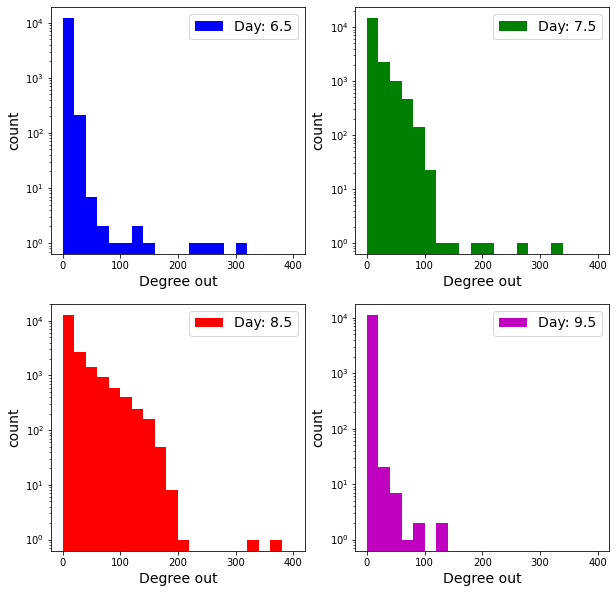

In [31]:
fig,ax=plt.subplots(2,2,figsize=(10,10))
a=ax[0,0].hist(np.array(G65.out_degree)[:,1].astype(int),log=True,bins=20, color="blue",label="Day: 6.5",range=[-0.1,400])
b=ax[0,1].hist(np.array(G75.out_degree)[:,1].astype(int),log=True,bins=20, color="green",label="Day: 7.5",range=[-0.1,400])
c=ax[1,0].hist(np.array(G85.out_degree)[:,1].astype(int),log=True,bins=20, color="red",label="Day: 8.5",range=[-0.1,400])
d=ax[1,1].hist(np.array(G95.out_degree)[:,1].astype(int),log=True,bins=20, color="m",label="Day: 9.5",range=[-0.1,400])
ax[0,0].set_xlabel("Degree out",fontsize=14)
ax[0,0].set_ylabel("count",fontsize=14)
ax[0,1].set_xlabel("Degree out",fontsize=14)
ax[0,1].set_ylabel("count",fontsize=14)
ax[1,0].set_xlabel("Degree out",fontsize=14)
ax[1,0].set_ylabel("count",fontsize=14)
ax[1,1].set_xlabel("Degree out",fontsize=14)
ax[1,1].set_ylabel("count",fontsize=14)
ax[0,0].legend(fontsize=14)
ax[0,1].legend(fontsize=14)
ax[1,0].legend(fontsize=14)
ax[1,1].legend(fontsize=14)
fig.savefig("degree_out_cutoff_6_9.png")

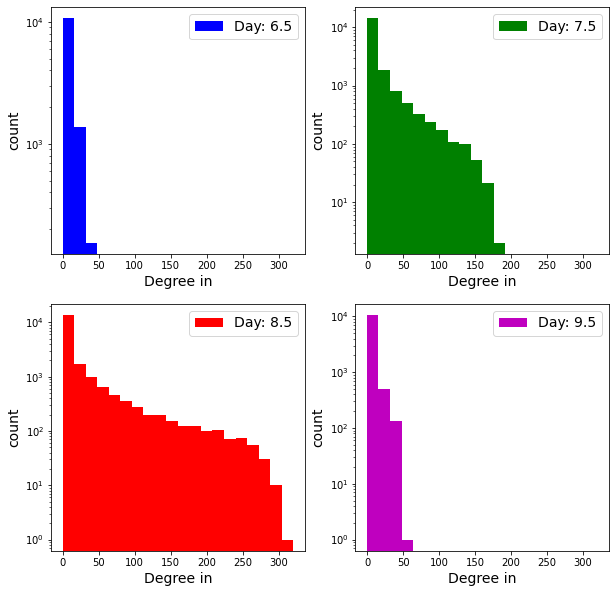

In [67]:
fig,ax=plt.subplots(2,2,figsize=(10,10))
a1=ax[0,0].hist(np.array(G65.in_degree)[:,1].astype(int),log=True,bins=20, color="blue",label="Day: 6.5",range=[-0.1,320])
b1=ax[0,1].hist(np.array(G75.in_degree)[:,1].astype(int),log=True,bins=20, color="green",label="Day: 7.5",range=[-0.1,320])
c1=ax[1,0].hist(np.array(G85.in_degree)[:,1].astype(int),log=True,bins=20, color="red",label="Day: 8.5",range=[-0.1,320])
d1=ax[1,1].hist(np.array(G95.in_degree)[:,1].astype(int),log=True,bins=20, color="m",label="Day: 9.5",range=[-0.1,320])
ax[0,0].set_xlabel("Degree in",fontsize=14)
ax[0,0].set_ylabel("count",fontsize=14)
ax[0,1].set_xlabel("Degree in",fontsize=14)
ax[0,1].set_ylabel("count",fontsize=14)
ax[1,0].set_xlabel("Degree in",fontsize=14)
ax[1,0].set_ylabel("count",fontsize=14)
ax[1,1].set_xlabel("Degree in",fontsize=14)
ax[1,1].set_ylabel("count",fontsize=14)
ax[0,0].legend(fontsize=14)
ax[0,1].legend(fontsize=14)
ax[1,0].legend(fontsize=14)
ax[1,1].legend(fontsize=14)


fig.savefig("degree_oin_cutoff_6_9.png")

<ipython-input-65-a3b5d9f398cd>:2: RuntimeWarning: divide by zero encountered in log10
  ax[0,0].plot(np.log10(a[1][1:]),np.log10(a[0]),'.--',label="day: 3")
<ipython-input-65-a3b5d9f398cd>:3: RuntimeWarning: divide by zero encountered in log10
  ax[0,1].plot(np.log10(b[1][1:]),np.log10(b[0]),'.--r',label="day: 4")
<ipython-input-65-a3b5d9f398cd>:4: RuntimeWarning: divide by zero encountered in log10
  ax[1,0].plot(np.log10(c[1][1:]),np.log10(c[0]),'.--g',label="day: 5")
<ipython-input-65-a3b5d9f398cd>:5: RuntimeWarning: divide by zero encountered in log10
  ax[1,1].plot(np.log10(d[1][1:]),np.log10(d[0]),'.--y',label="day: 6")


Text(0, 0.5, 'Count')

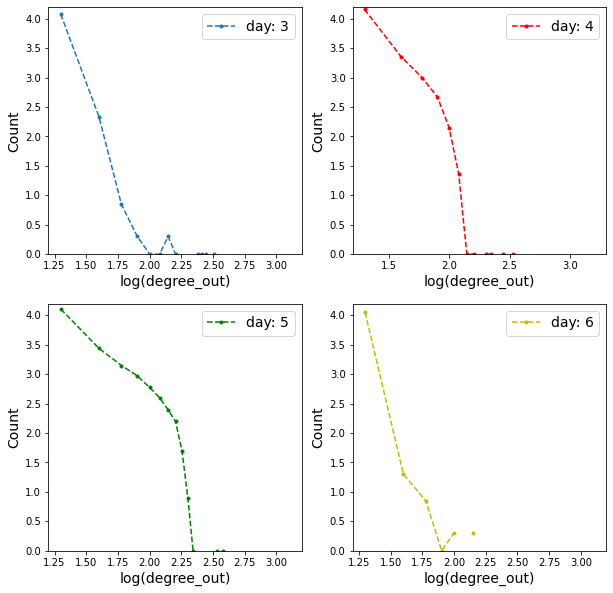

In [65]:
fig,ax=plt.subplots(2,2,figsize=(10,10))
ax[0,0].plot(np.log10(a[1][1:]),np.log10(a[0]),'.--',label="day: 3")
ax[0,1].plot(np.log10(b[1][1:]),np.log10(b[0]),'.--r',label="day: 4")
ax[1,0].plot(np.log10(c[1][1:]),np.log10(c[0]),'.--g',label="day: 5")
ax[1,1].plot(np.log10(d[1][1:]),np.log10(d[0]),'.--y',label="day: 6")
ax[0,0].legend(fontsize=14)
ax[0,1].legend(fontsize=14)
ax[1,0].legend(fontsize=14)
ax[1,1].legend(fontsize=14)
ax[0,0].set_ylim(0,4.2)
ax[0,1].set_ylim(0,4.2)
ax[1,0].set_ylim(0,4.2)
ax[1,1].set_ylim(0,4.2)
ax[0,0].set_xlim(1.2,3.2)
ax[0,1].set_xlim(1.2,3.3)
ax[1,0].set_xlim(1.2,3.2)
ax[1,1].set_xlim(1.2,3.2)
ax[0,0].set_xlabel("log(degree_out)",fontsize=14)
ax[0,1].set_xlabel("log(degree_out)",fontsize=14)
ax[1,0].set_xlabel("log(degree_out)",fontsize=14)
ax[1,1].set_xlabel("log(degree_out)",fontsize=14)
ax[0,0].set_ylabel("Count",fontsize=14)
ax[0,1].set_ylabel("Count",fontsize=14)
ax[1,0].set_ylabel("Count",fontsize=14)
ax[1,1].set_ylabel("Count",fontsize=14)

<ipython-input-66-1c62bf1b06ca>:2: RuntimeWarning: divide by zero encountered in log10
  ax[0,0].plot(np.log10(a1[1][1:]),np.log10(a1[0]),'.--',label="day: 3")
<ipython-input-66-1c62bf1b06ca>:3: RuntimeWarning: divide by zero encountered in log10
  ax[0,1].plot(np.log10(b1[1][1:]),np.log10(b1[0]),'.--r',label="day: 4")
<ipython-input-66-1c62bf1b06ca>:4: RuntimeWarning: divide by zero encountered in log10
  ax[1,0].plot(np.log10(c1[1][1:]),np.log10(c1[0]),'.--g',label="day: 5")
<ipython-input-66-1c62bf1b06ca>:5: RuntimeWarning: divide by zero encountered in log10
  ax[1,1].plot(np.log10(d1[1][1:]),np.log10(d1[0]),'.--y',label="day: 6")


Text(0, 0.5, 'Count')

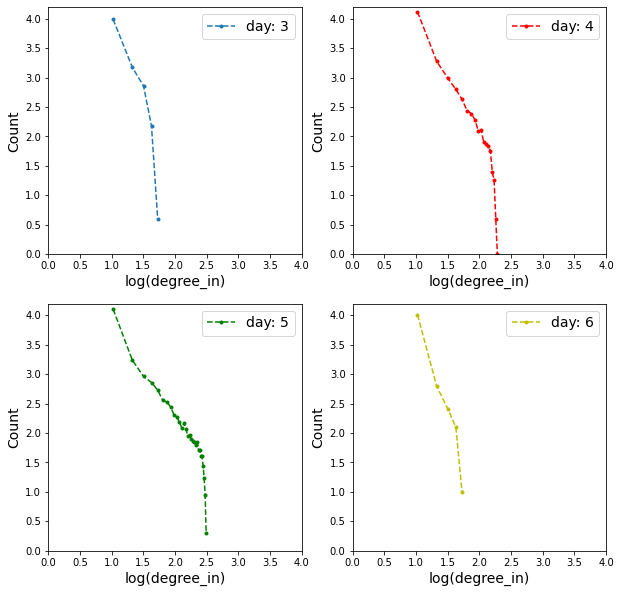

In [66]:
fig,ax=plt.subplots(2,2,figsize=(10,10))
ax[0,0].plot(np.log10(a1[1][1:]),np.log10(a1[0]),'.--',label="day: 3")
ax[0,1].plot(np.log10(b1[1][1:]),np.log10(b1[0]),'.--r',label="day: 4")
ax[1,0].plot(np.log10(c1[1][1:]),np.log10(c1[0]),'.--g',label="day: 5")
ax[1,1].plot(np.log10(d1[1][1:]),np.log10(d1[0]),'.--y',label="day: 6")
ax[0,0].legend(fontsize=14)
ax[0,1].legend(fontsize=14)
ax[1,0].legend(fontsize=14)
ax[1,1].legend(fontsize=14)
ax[0,0].set_ylim(0,4.2)
ax[0,1].set_ylim(0,4.2)
ax[1,0].set_ylim(0,4.2)
ax[1,1].set_ylim(0,4.2)
ax[0,0].set_xlim(0,4)
ax[0,1].set_xlim(0,4)
ax[1,0].set_xlim(0,4)
ax[1,1].set_xlim(0,4)
ax[0,0].set_xlabel("log(degree_in)",fontsize=14)
ax[0,1].set_xlabel("log(degree_in)",fontsize=14)
ax[1,0].set_xlabel("log(degree_in)",fontsize=14)
ax[1,1].set_xlabel("log(degree_in)",fontsize=14)
ax[0,0].set_ylabel("Count",fontsize=14)
ax[0,1].set_ylabel("Count",fontsize=14)
ax[1,0].set_ylabel("Count",fontsize=14)
ax[1,1].set_ylabel("Count",fontsize=14)

In [39]:
Bet65=np.load("Bet_SGN_6.5.npy")
Bet75=np.load("Bet_SGN_7.5.npy")
Bet85=np.load("Bet_SGN_8.5.npy")
Bet95=np.load("Bet_SGN_9.5.npy")

In [40]:
Bet65[1,:]

array(['0.0', '0.0', '0.007813289876137771', ..., '0.0', '0.0', '0.0'],
      dtype='<U32')

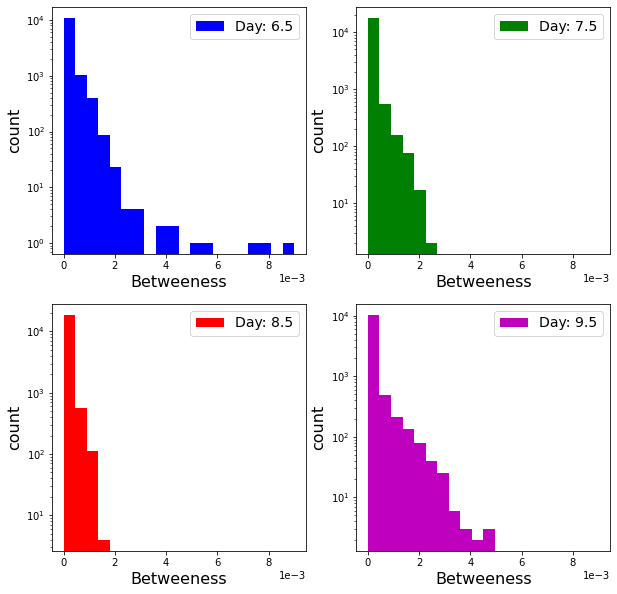

In [60]:
fig,ax=plt.subplots(2,2,figsize=(10,10))
a1=ax[0,0].hist(Bet65[1,:].astype(float),log=True,bins=20, color="blue",label="Day: 6.5",range=[0,0.009])
b1=ax[0,1].hist(Bet75[1,:].astype(float),log=True,bins=20, color="green",label="Day: 7.5",range=[0,0.009])
c1=ax[1,0].hist(Bet85[1,:].astype(float),log=True,bins=20, color="red",label="Day: 8.5",range=[0,0.009])
d1=ax[1,1].hist(Bet95[1,:].astype(float),log=True,bins=20, color="m",label="Day: 9.5",range=[0,0.009])
ax[0,0].set_xlabel("Betweeness",fontsize=16)
ax[0,0].set_ylabel("count",fontsize=16)
ax[0,1].set_xlabel("Betweeness",fontsize=16)
ax[0,1].set_ylabel("count",fontsize=16)
ax[1,0].set_xlabel("Betweeness",fontsize=16)
ax[1,0].set_ylabel("count",fontsize=16)
ax[1,1].set_xlabel("Betweeness",fontsize=16)
ax[1,1].set_ylabel("count",fontsize=16)
ax[0,0].legend(fontsize=14)
ax[0,1].legend(fontsize=14)
ax[1,0].legend(fontsize=14)
ax[1,1].legend(fontsize=14)
ax[0,0].ticklabel_format(axis="x", style="sci", scilimits=(0,0))
ax[0,1].ticklabel_format(axis="x", style="sci", scilimits=(0,0))
ax[1,0].ticklabel_format(axis="x", style="sci", scilimits=(0,0))
ax[1,1].ticklabel_format(axis="x", style="sci", scilimits=(0,0))
fig.savefig("Betweeness_SGN.png")